**Import all the required libraries**

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Load the dataset california housing**

In [4]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [5]:
dataset=pd.DataFrame(data.data,columns=data.feature_names)
dataset['price']=data.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


BoxPlot : To detect the outliers in a given dataset

<Axes: >

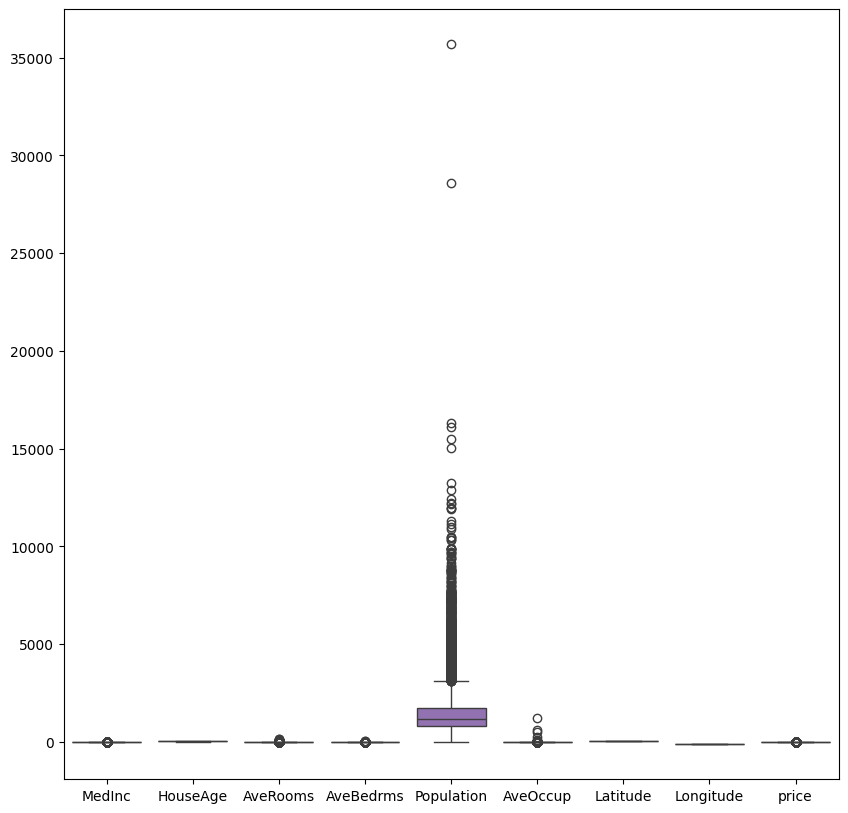

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=dataset, ax=ax)

In [8]:
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

**Split the data into train and test set**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

 Normalization of the given data points

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

<Axes: >

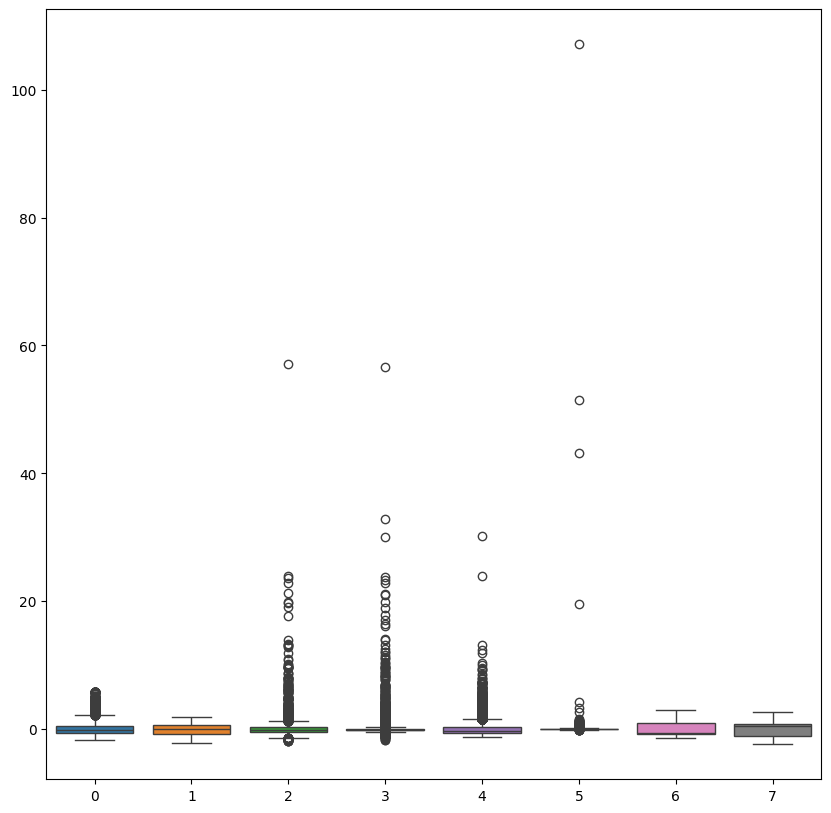

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=X_train_scaled, ax=ax)

Test data tranform

<Axes: >

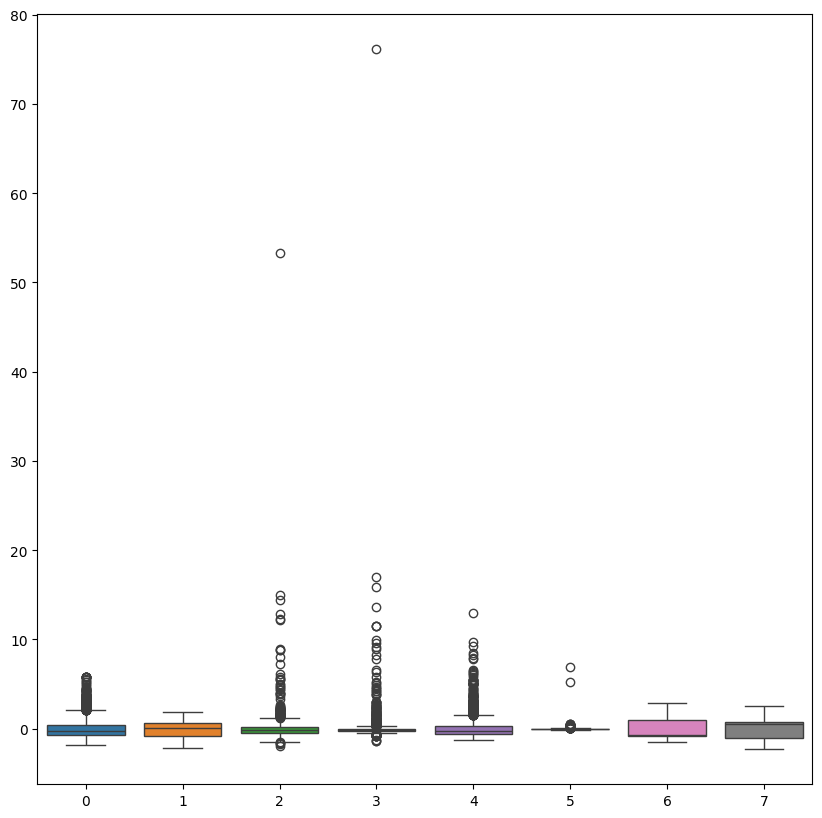

In [12]:
X_test_scaled=scaler.transform(X_test)
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=X_test_scaled, ax=ax)


Model Training

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_scaled,Y_train)
pred=model.predict(X_test_scaled)


In [36]:
print(model.coef_)
print(model.intercept_)
pred

[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
2.071946937378881


array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

Residuals

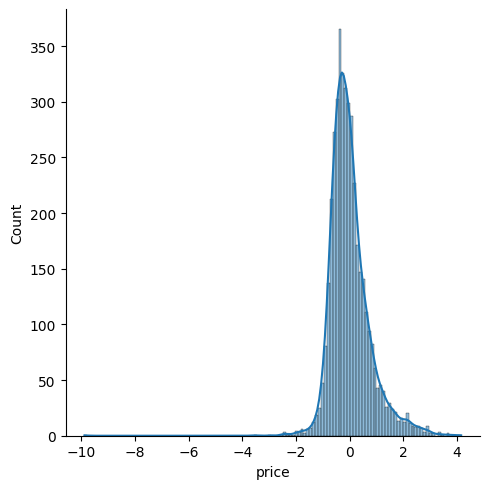

In [14]:
residuals=Y_test-pred
residuals
sns.displot(residuals,kde=True)

Performance

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(Y_test,pred)
mae=mean_absolute_error(Y_test,pred)
r2=r2_score(Y_test,pred)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("R-squared:",r2)
print("Root Mean Squared Error:",np.sqrt(mse))
adjusted_r2 = 1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test_scaled.shape[1]-1)
print("Adjusted R-squared:",adjusted_r2)


Mean Squared Error: 0.5558915986952444
Mean Absolute Error: 0.5332001304956565
R-squared: 0.5757877060324508
Root Mean Squared Error: 0.7455813830127764
Adjusted R-squared: 0.5749637928613558


In [18]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [19]:
model = pickle.load(open('model.pkl', 'rb'))